# TP cours Deep Learning et Applications :

In [20]:
# Import des librairies

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# from pandas_profiling import ProfileReport
# profil = ProfileReport(df)

# Dataset SPAM


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [23]:
df = pd.read_csv('/home/yasser_wsl/ECC-Projet-option/deeplearning-cours/spam.csv')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,...,word_freq_table,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,...,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,...,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,...,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,...,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,...,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,...,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,...,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Dans la détection de courriers indésirables (spam), les techniques de prétraitement du texte comme la tokenization, le retrait des stopwords et le stemming sont cruciales pour préparer les données avant l'analyse. Voici comment et quand les utiliser :

1. **Word Tokenization** :
   - **Quand l'utiliser :** La tokenization est la première étape du traitement du texte. Elle consiste à diviser le texte en mots ou en "tokens".
   - **Comment l'utiliser pour la détection de spam :** Elle permet de segmenter chaque email en mots distincts. Cela facilite l'analyse du contenu en isolant chaque élément pour des traitements ultérieurs.

2. **Retrait des Stopwords** :
   - **Quand l'utiliser :** Les stopwords sont des mots très courants (comme "et", "le", "de", etc.) qui ne portent pas une signification spécifique pour une analyse. Ils peuvent être retirés pour améliorer la qualité de l'analyse.
   - **Comment l'utiliser pour la détection de spam :** En retirant les stopwords des emails, on se concentre sur les mots plus significatifs, ce qui peut aider à identifier les motifs caractéristiques du spam.

3. **Stemming** :
   - **Quand l'utiliser :** Le stemming réduit les mots à leur forme racine (par exemple, "manger", "mangeais", "mangerais" deviendrait "mang"). Cela réduit la variabilité des mots, regroupant les termes similaires.
   - **Comment l'utiliser pour la détection de spam :** En réduisant les mots à leur racine, le modèle peut mieux généraliser et détecter des similarités entre les mots ayant une signification similaire, même s'ils sont écrits différemment.

Pour la détection de spam, l'application de ces techniques permet de préparer les données textuelles de manière à ce que les modèles de machine learning puissent identifier plus efficacement les caractéristiques distinctives des emails indésirables.

## Exemple explicative de ces techniques : 
Bien sûr, voici un exemple simple de dataset brut représentant quelques emails :

```plaintext
Email 1: "Hey! Get a free iPhone now!"
Email 2: "Meeting scheduled for tomorrow."
Email 3: "Claim your prize! You've won $1000!"
```

Appliquons les techniques mentionnées : la tokenization, le retrait des stopwords et le stemming.

### 1. Tokenization :
Divisons chaque email en mots ou tokens.

**Emails tokenizés :**
- Email 1: ["Hey", "Get", "a", "free", "iPhone", "now"]
- Email 2: ["Meeting", "scheduled", "for", "tomorrow"]
- Email 3: ["Claim", "your", "prize", "You've", "won", "$1000"]

### 2. Retrait des Stopwords :
Retirons les mots courants ("a", "for", "your", etc.).

**Emails sans stopwords :**
- Email 1: ["Hey", "Get", "free", "iPhone", "now"]
- Email 2: ["Meeting", "scheduled", "tomorrow"]
- Email 3: ["Claim", "prize", "You've", "won", "$1000"]

### 3. Stemming :
Réduisons les mots à leur forme racine.

**Emails avec stemming :**
- Email 1: ["Hey", "Get", "free", "iPhon", "now"]
- Email 2: ["Meet", "schedul", "tomorrow"]
- Email 3: ["Claim", "prize", "You'v", "won", "$1000"]

La forme finale après l'application de ces techniques est une représentation des emails sous forme de listes de mots ou de tokens, prêtes à être utilisées pour l'analyse ou pour entraîner un modèle de détection de spam.

# Analyse exploratoire :

In [24]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,...,word_freq_table,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,...,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,...,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,...,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,2.610000,9.670000,...,2.170000,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [25]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [26]:
from sklearn.preprocessing import MinMaxScaler

def normalize_features(dataset, target_column):
    features = dataset.drop(columns=[target_column])
    scaler = MinMaxScaler()
    normalized_features = scaler.fit_transform(features)
    normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
    normalized_df[target_column] = dataset[target_column]
    return normalized_df


In [27]:
df_normalized = normalize_features(df, 'spam')

In [28]:
df_normalized.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,...,word_freq_table,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.023029,0.014917,0.055031,0.001528,0.031222,0.016310,0.015709,0.009477,0.017123,0.013169,0.022921,0.056019,...,0.002509,0.003187,0.008797,0.014257,0.004160,0.008285,0.012629,0.002231,0.003805,0.005123,0.017821,0.394045
std,0.067259,0.090376,0.098852,0.032589,0.067251,0.046569,0.053843,0.036100,0.052969,0.035465,0.077220,0.089110,...,0.035149,0.028573,0.055524,0.027723,0.026806,0.025115,0.040960,0.021652,0.028806,0.019513,0.038280,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000534,0.000501,0.002146,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010341,...,0.000000,0.000000,0.000000,0.006665,0.000000,0.000000,0.000000,0.000000,0.001158,0.001402,0.005934,0.000000
75%,0.000000,0.000000,0.082353,0.000000,0.038000,0.000000,0.000000,0.000000,0.000000,0.008801,0.000000,0.082730,...,0.000000,0.000000,0.000000,0.019278,0.000000,0.009699,0.008662,0.000000,0.002457,0.004205,0.016730,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


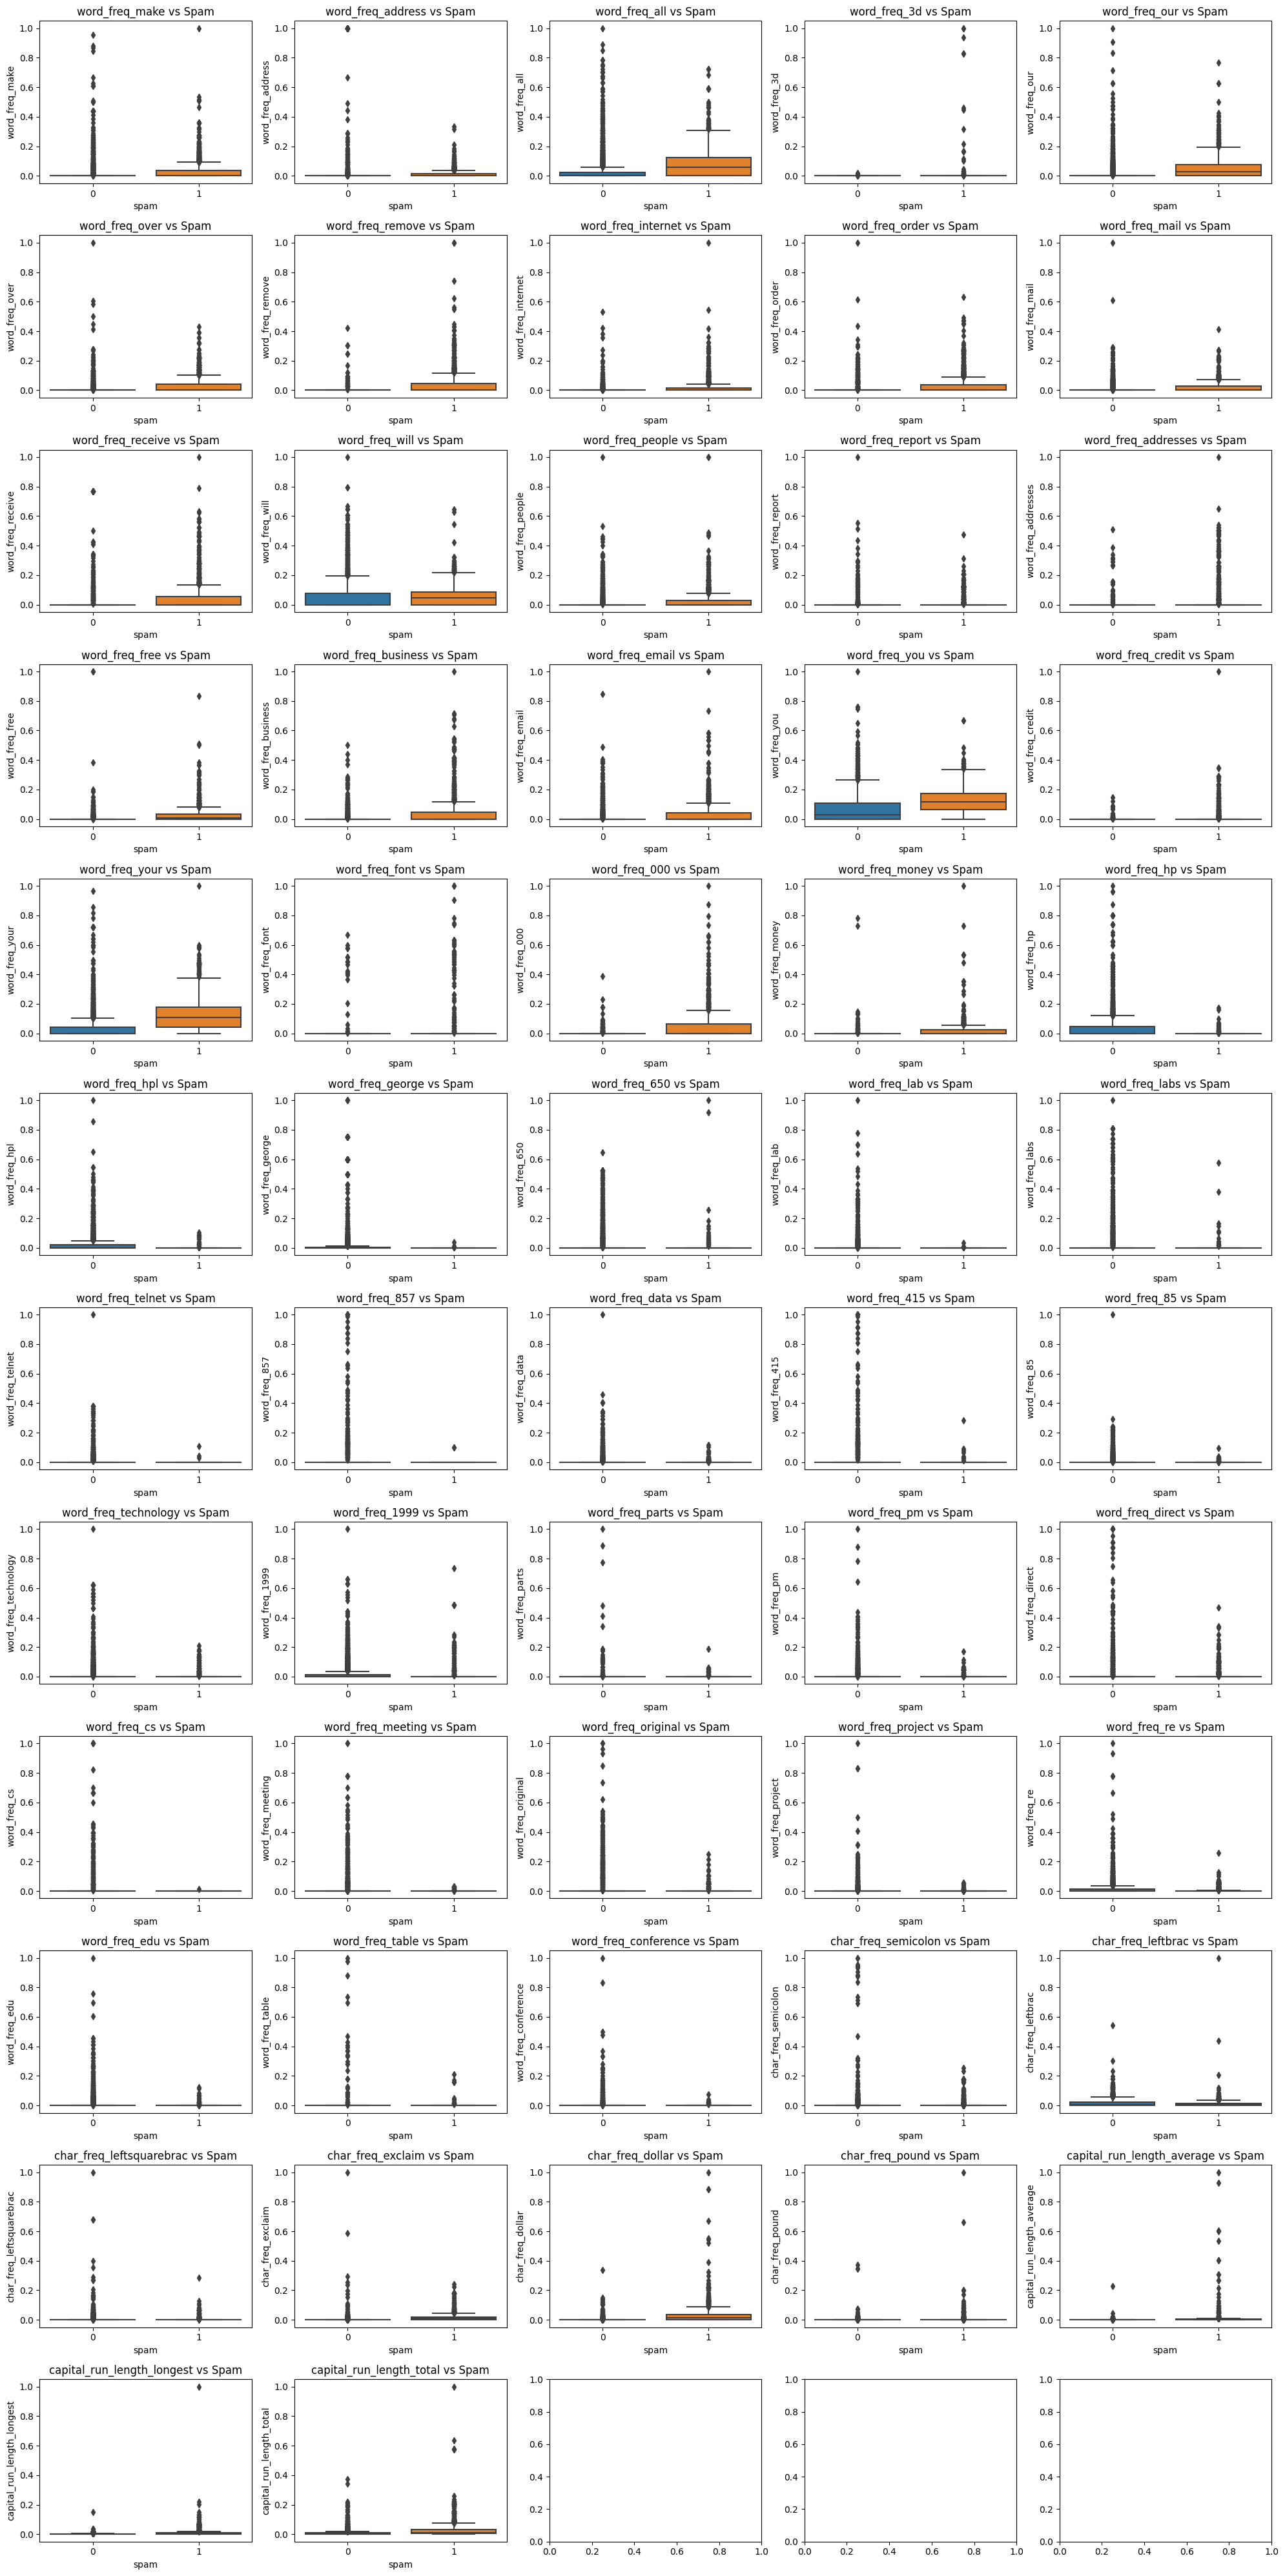

In [29]:
categorical_sub = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_semicolon', 'char_freq_leftbrac', 'char_freq_leftsquarebrac',
       'char_freq_exclaim', 'char_freq_dollar', 'char_freq_pound',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total']

dataset = df_normalized.copy()
X = dataset[categorical_sub]

fig, ax = plt.subplots(len(X.columns) // 5 + 1, 5, figsize=(20, 40))
ax = ax.flatten()

for i in range(len(X.columns)):
    if i < len(X.columns):  # Pour éviter l'erreur si le nombre de colonnes n'est pas divisible par 5
        if dataset[X.columns[i]].dtype == 'float64' or dataset[X.columns[i]].dtype == 'int64':
            sns.boxplot(y=dataset[X.columns[i]], x=dataset['spam'], ax=ax[i])
            ax[i].set_title(f"{X.columns[i]} vs Spam")
        else:
            sns.barplot(x=dataset['spam'], y=dataset[X.columns[i]], ax=ax[i])
            ax[i].set_title(f"{X.columns[i]} vs Spam")
    else:
        ax[i].remove()  # Supprime les subplots supplémentaires s'ils ne sont pas utilisés

plt.tight_layout()
plt.show()


<Axes: >

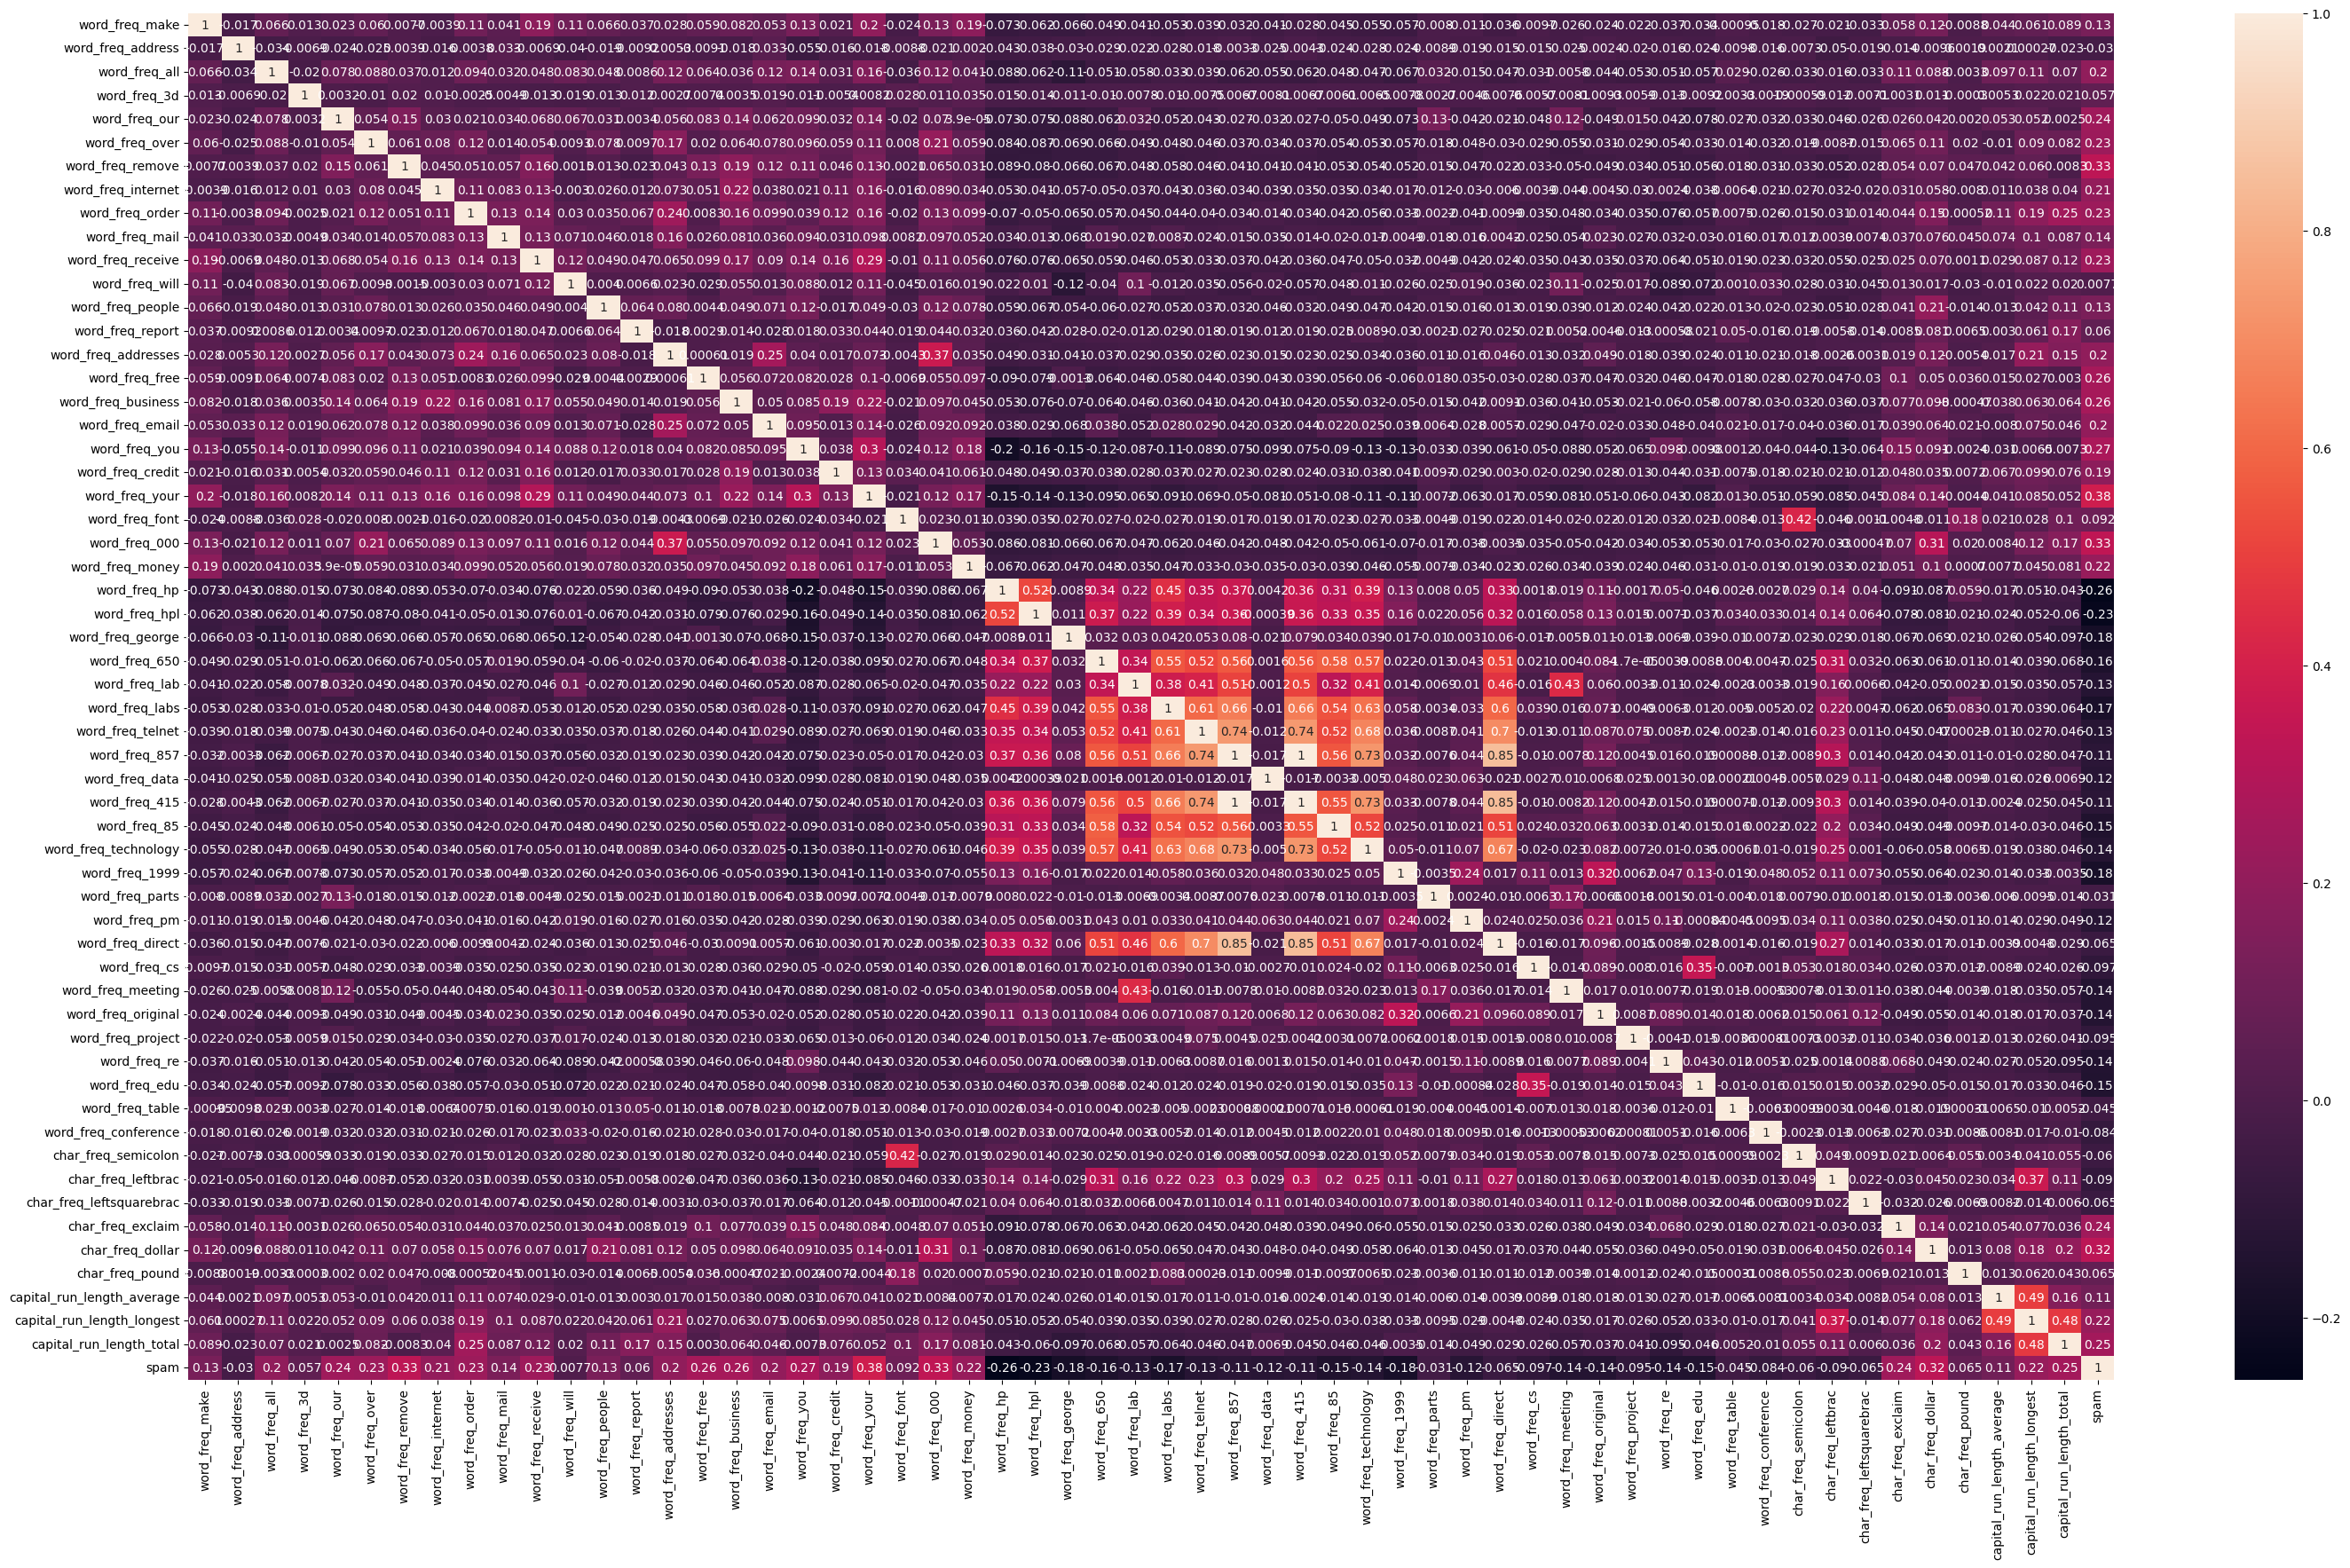

In [30]:
fig, ax = plt.subplots(figsize=(35,20))
sns.heatmap(df_normalized.corr(), annot=True, ax=ax)

In [31]:
# Calculer la corrélation avec 'spam'
correlation_with_spam = df_normalized.corr()['spam'].sort_values(ascending=False)

# Exclure la corrélation de 'spam' avec elle-même
correlation_with_spam = correlation_with_spam.drop('spam')

# Trier les valeurs de corrélation par ordre décroissant
ordered_correlation = correlation_with_spam.abs().sort_values(ascending=False)
print(ordered_correlation)


word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_dollar              0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_hp                  0.256723
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_exclaim             0.241888
word_freq_receive             0.234529
word_freq_hpl                 0.232968
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_george              0.183404
word_freq_1999                0.178045
word_freq_labs                0.171095
word_freq_650            

In [32]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Modèles :

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
dataset = df_normalized.copy()

In [35]:
dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,...,word_freq_table,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066184,...,0.0,0.0,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,0.080460,0.081696,...,0.0,0.0,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,0.145594,0.046536,...,0.0,0.0,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,0.032058,...,0.0,0.0,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,0.032058,...,0.0,0.0,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,0.000000,0.194416,...,0.0,0.0,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492,0
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821,0
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186143,...,0.0,0.0,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386,0
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033092,...,0.0,0.0,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861,0


In [36]:
# Supposons X contient les caractéristiques et y la variable cible ('spam')
X = df.drop('spam', axis=1)  # Assure-toi que 'spam' est exclue des caractéristiques
y = df['spam']
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [37]:
# Supposons X contient les caractéristiques et y la variable cible ('spam')
XNrml = dataset.drop('spam', axis=1)  # Assure-toi que 'spam' est exclue des caractéristiques
yNrml = dataset['spam']
# Séparation des données en ensembles d'entraînement et de test
X_trainNrml, X_testNrml, y_trainNrml, y_testNrml = train_test_split(XNrml, yNrml, test_size=0.15, random_state=42)

## logistic regression :

In [38]:
# Hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

In [39]:
# Initialisation du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=5000)

# Initialisation de GridSearchCV avec validation croisée (5 folds ici)
grid_searchNrml = GridSearchCV(logistic_model, param_grid, cv=7)
grid_search= GridSearchCV(logistic_model, param_grid, cv=7)


In [40]:
# Entraînement du modèle avec GridSearchCV
grid_searchNrml.fit(X_trainNrml, y_trainNrml)

GridSearchCV(cv=7, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']})

In [41]:
# Entraînement du modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']})

Accuracy pour LogisticRegression Non normalized data: 0.9204052098408104
Classification Report pour LogisticRegression Non normalized data:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       387
           1       0.94      0.87      0.91       304

    accuracy                           0.92       691
   macro avg       0.92      0.92      0.92       691
weighted avg       0.92      0.92      0.92       691

Accuracy pour LogisticRegression normalized data: 0.914616497829233
Classification Report pour LogisticRegression normalized data:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       387
           1       0.95      0.86      0.90       304

    accuracy                           0.91       691
   macro avg       0.92      0.91      0.91       691
weighted avg       0.92      0.91      0.91       691



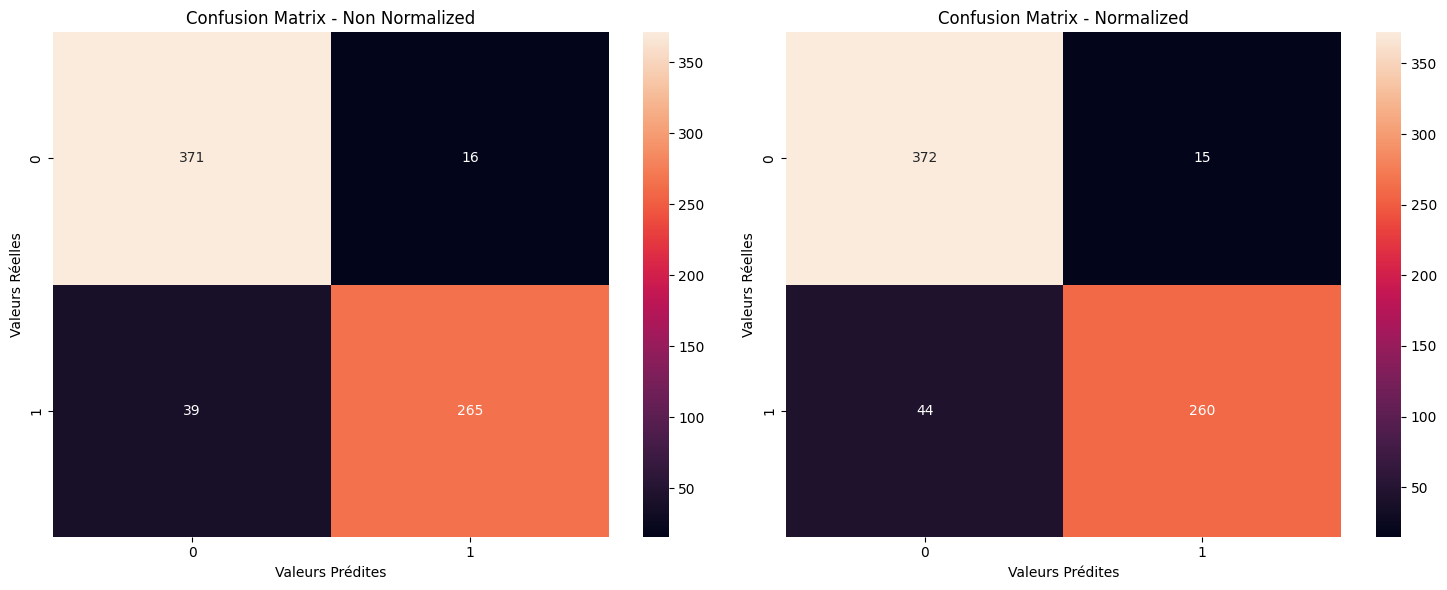

In [52]:
# Meilleur modèle trouvé par GridSearchCV
best_model_Nrml = grid_searchNrml.best_estimator_
best_model = grid_search.best_estimator_
# Prédiction sur les données de test
y_predNrml = best_model_Nrml.predict(X_testNrml)
y_pred = best_model.predict(X_test)
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracyNrml = accuracy_score(y_testNrml, y_predNrml)
class_reportNrml = classification_report(y_testNrml, y_predNrml)


print(f"Accuracy pour LogisticRegression Non normalized data: {accuracy}")
print(f"Classification Report pour LogisticRegression Non normalized data:\n{class_report}")

print(f"Accuracy pour LogisticRegression normalized data: {accuracyNrml}")
print(f"Classification Report pour LogisticRegression normalized data:\n{class_reportNrml}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Création d'une grille de subplots

# Graphique pour le modèle avec données non normalisées
conf_matrix_non_normalized = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_non_normalized, annot=True, ax=axes[0], fmt='d')  # fmt='d' pour formater les nombres en entiers
axes[0].set_title('Confusion Matrix - Non Normalized')
axes[0].set_xlabel('Valeurs Prédites')
axes[0].set_ylabel('Valeurs Réelles')

# Graphique pour le modèle avec données normalisées
conf_matrix_normalized = confusion_matrix(y_testNrml, y_predNrml)
sns.heatmap(conf_matrix_normalized, annot=True, ax=axes[1], fmt='d')  # fmt='d' pour formater les nombres en entiers
axes[1].set_title('Confusion Matrix - Normalized')
axes[1].set_xlabel('Valeurs Prédites')
axes[1].set_ylabel('Valeurs Réelles')

plt.tight_layout()  # Ajustement automatique pour éviter le chevauchement
plt.show()

## Random Forest : 

In [23]:
# Hyperparamètres à rechercher pour Random Forest
param_grid = {
    'n_estimators': [50, 75, 100],  # Nombre d'arbres dans la forêt
    'max_depth': [35, 40, 45],  # Profondeur maximale de chaque arbre
    'min_samples_split': [ 2, 4 , 3, 5]   # Nombre minimal d'échantillons requis pour scinder un nœud
}

# Initialisation du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Initialisation de GridSearchCV avec validation croisée (7 folds ici)
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=7)

grid_search_rfNrml = GridSearchCV(rf_model, param_grid, cv=7)

In [24]:
# Entraînement avec GridSearchCV pour Random Forest
grid_search_rf.fit(X_train, y_train)

# Meilleurs paramètres trouvés pour Random Forest
best_params_rf = grid_search_rf.best_params_
print(f"Meilleurs paramètres pour Random Forest: {best_params_rf}")

Meilleurs paramètres pour Random Forest: {'max_depth': 45, 'min_samples_split': 3, 'n_estimators': 50}


In [25]:
# Meilleur modèle trouvé par GridSearchCV pour Random Forest
best_model_rf = grid_search_rf.best_estimator_

# Prédiction sur les données de test avec le meilleur modèle
y_pred_rf = best_model_rf.predict(X_test)

In [26]:
# Normalized data :
# Entraînement avec GridSearchCV pour Random Forest
grid_search_rfNrml.fit(X_trainNrml, y_trainNrml)


GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [35, 40, 45],
                         'min_samples_split': [2, 4, 3, 5],
                         'n_estimators': [50, 75, 100]})

In [27]:
# Meilleurs paramètres trouvés pour Random Forest
best_params_rf_Nrml = grid_search_rfNrml.best_params_
print(f"Meilleurs paramètres pour Random Forest: {best_params_rf_Nrml}")

Meilleurs paramètres pour Random Forest: {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 75}


In [28]:
# Meilleur modèle trouvé par GridSearchCV pour Random Forest
best_model_rfNrml = grid_search_rfNrml.best_estimator_

# Prédiction sur les données de test avec le meilleur modèle
y_pred_rfNrml = best_model_rf.predict(X_testNrml)

Accuracy pour Random Forest Non normalized data: 0.9493487698986975
Classification Report pour Random Forest Non normalized data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       387
           1       0.98      0.91      0.94       304

    accuracy                           0.95       691
   macro avg       0.95      0.94      0.95       691
weighted avg       0.95      0.95      0.95       691

Accuracy pour Random Forest normalized data: 0.5788712011577424
Classification Report pour Random Forest normalized data:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       387
           1       1.00      0.04      0.08       304

    accuracy                           0.58       691
   macro avg       0.79      0.52      0.40       691
weighted avg       0.76      0.58      0.44       691



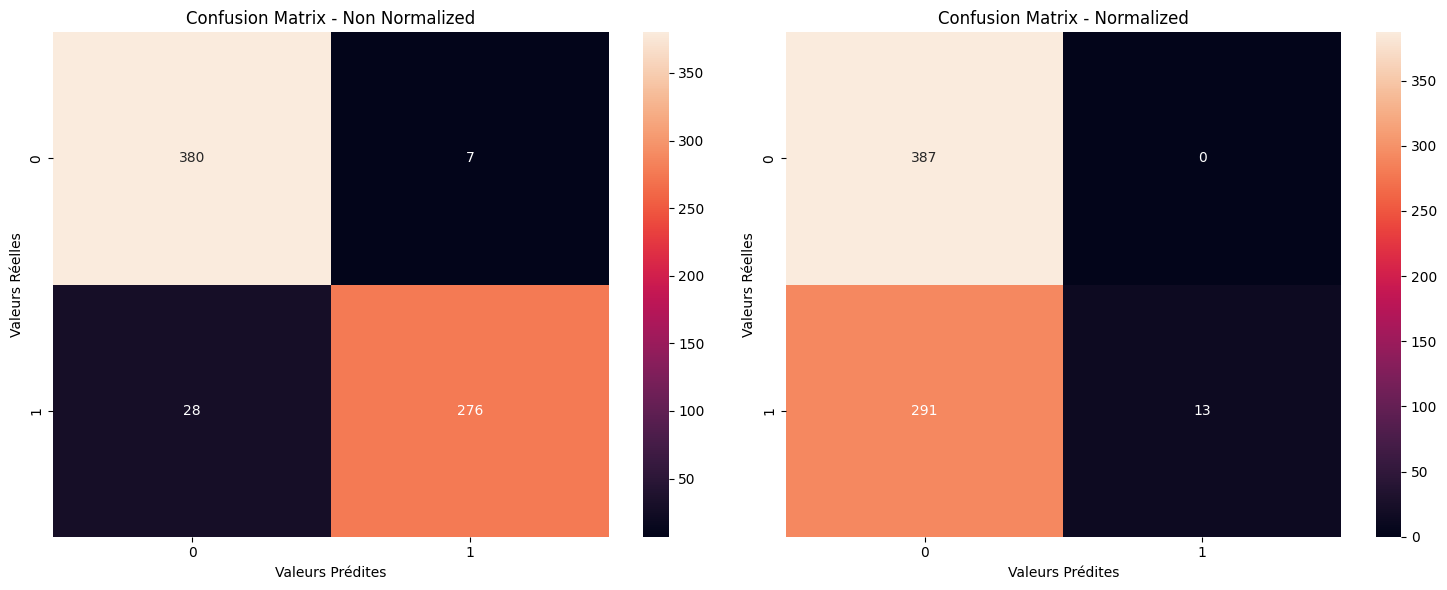

In [29]:
# Évaluation du modèle Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Évaluation du modèle Random Forest
accuracy_rfNrml = accuracy_score(y_testNrml, y_pred_rfNrml)
class_report_rfNrml = classification_report(y_testNrml, y_pred_rfNrml)

print(f"Accuracy pour Random Forest Non normalized data: {accuracy_rf}")
print(f"Classification Report pour Random Forest Non normalized data:\n{class_report_rf}")

print(f"Accuracy pour Random Forest normalized data: {accuracy_rfNrml}")
print(f"Classification Report pour Random Forest normalized data:\n{class_report_rfNrml}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Création d'une grille de subplots

# Graphique pour le modèle avec données non normalisées
conf_matrix_non_normalized = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_non_normalized, annot=True, ax=axes[0], fmt='d')  # fmt='d' pour formater les nombres en entiers
axes[0].set_title('Confusion Matrix - Non Normalized')
axes[0].set_xlabel('Valeurs Prédites')
axes[0].set_ylabel('Valeurs Réelles')

# Graphique pour le modèle avec données normalisées
conf_matrix_normalized = confusion_matrix(y_testNrml, y_pred_rfNrml)
sns.heatmap(conf_matrix_normalized, annot=True, ax=axes[1], fmt='d')  # fmt='d' pour formater les nombres en entiers
axes[1].set_title('Confusion Matrix - Normalized')
axes[1].set_xlabel('Valeurs Prédites')
axes[1].set_ylabel('Valeurs Réelles')

plt.tight_layout()  # Ajustement automatique pour éviter le chevauchement
plt.show()



In [30]:
importances = best_model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_rf.estimators_], axis=0)

importancesNrml = best_model_rfNrml.feature_importances_
stdNrml = np.std([tree.feature_importances_ for tree in best_model_rfNrml.estimators_], axis=0)

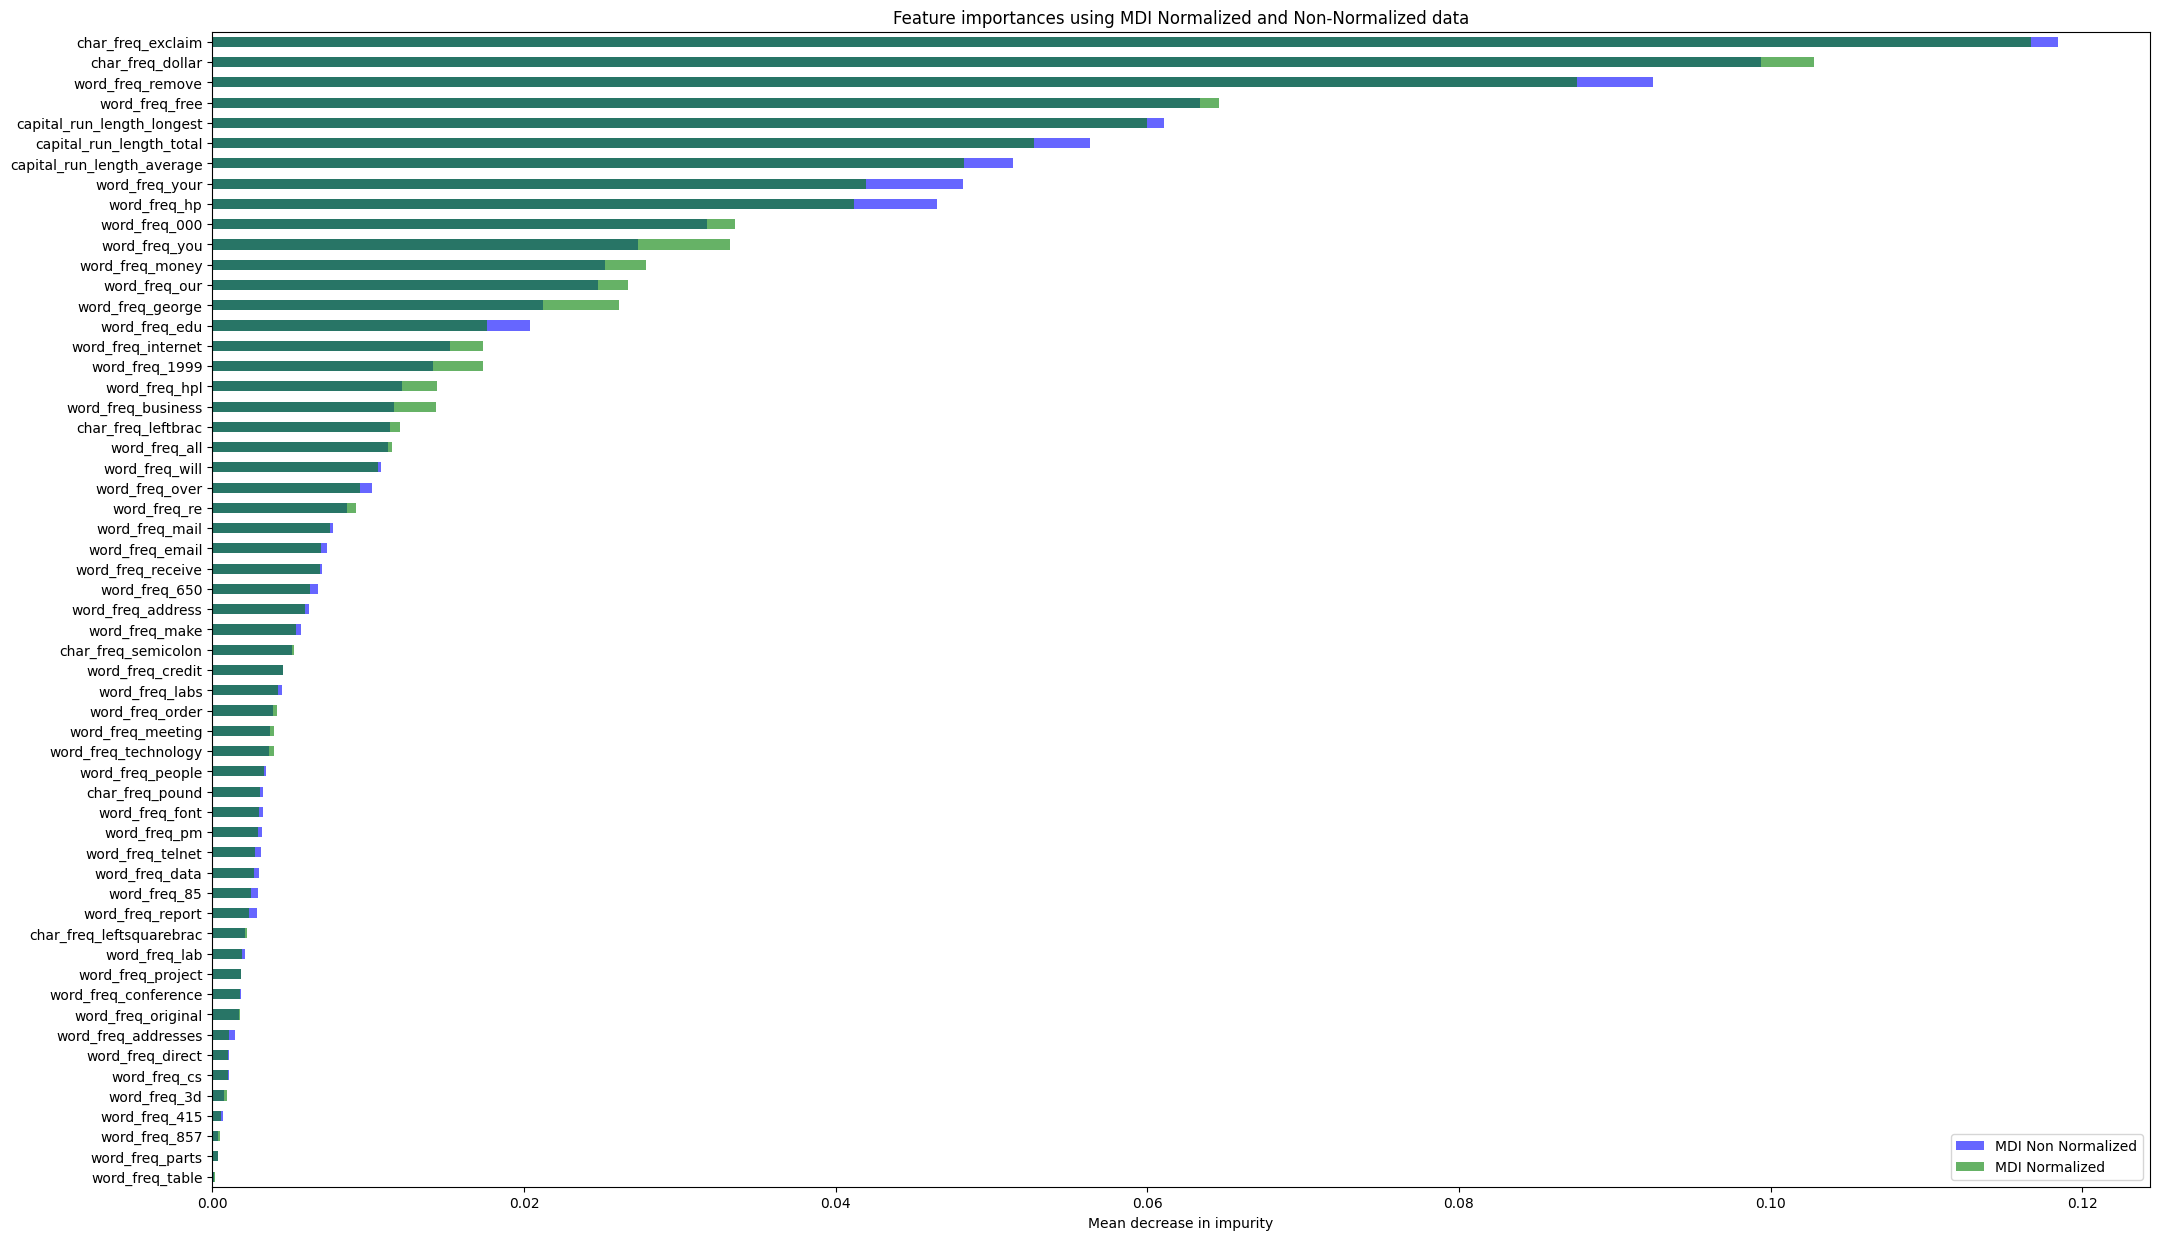

In [31]:
# Création du DataFrame avec les deux vecteurs
forest_importances = pd.DataFrame({
    'importances': importances,
    'std': std
}, index=categorical_sub)

forest_importancesNrml = pd.DataFrame({
    'importances': importancesNrml,
    'std': stdNrml
}, index=categorical_sub)


# Tri des valeurs par ordre décroissant en fonction des importances
sorted_importances = forest_importances.sort_values(by='importances', ascending=True)

# Tri des valeurs par ordre décroissant en fonction des importances
sorted_importancesNrml = forest_importancesNrml.sort_values(by='importances', ascending=True)

plt.figure(figsize=(25, 15))  # Taille personnalisée
sorted_importances['importances'].plot(kind='barh', color='blue', alpha=0.6, label='MDI Non Normalized')  # Barres bleues avec opacité 0.6
sorted_importancesNrml['importances'].plot(kind='barh', color='green', alpha=0.6, label='MDI Normalized')  # Barres vertes avec opacité 0.6
plt.title("Feature importances using MDI Normalized and Non-Normalized data")
plt.xlabel("Mean decrease in impurity")  # Changement d'axe
plt.legend()  # Ajout de la légende
plt.show()



## DNN :

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam
from keras_tuner.tuners import BayesianOptimization
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import keras_tuner as kt

Using TensorFlow backend


/tmp/ipykernel_852/3815548304.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [44]:
def build_model(hp):
    model = keras.Sequential()
    
    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
        # Ajouter une couche Dropout avec un hyperparamètre pour chaque couche
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [45]:
# # Initialiser le tuner
# tuner = kt.RandomSearch(build_model,
#                      objective='val_accuracy',
#                      max_trials=10,
#                      directory='./',
#                      project_name='spam_classifier_RandomSearch_200epochs')


In [46]:
# Initialiser le tuner 2
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=200,
                     factor=50,
                     directory='./',
                     project_name='spam_classifier_200epochs')


Reloading Tuner from ./spam_classifier_200epochs/tuner0.json


In [47]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [48]:
# Rechercher les meilleurs hyperparamètres
tuner.search(X_trainNrml, y_trainNrml, epochs=200, validation_split=0.15,callbacks=[stop_early])

In [49]:
# Obtenir le meilleur modèle
best_model_DNN = tuner.get_best_models(num_models=1)[0]
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

2023-12-22 19:21:02.878221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-22 19:21:03.123179: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/30
104/104 [==============================] - 2s 6ms/step - loss: 0.3969 - accuracy: 0.8101 - val_loss: 0.2049 - val_accuracy: 0.9302
Epoch 2/30
104/104 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9236 - val_loss: 0.2073 - val_accuracy: 0.9267
Epoch 3/30
104/104 [==============================] - 0s 4ms/step - loss: 0.1928 - accuracy: 0.9356 - val_loss: 0.1863 - val_accuracy: 0.9353
Epoch 4/30
104/104 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 0.9389 - val_loss: 0.2034 - val_accuracy: 0.9216
Epoch 5/30
104/104 [==============================] - 0s 4ms/step - loss: 0.1678 - accuracy: 0.9383 - val_loss: 0.1809 - val_accuracy: 0.9387
Epoch 6/30
104/104 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.9464 - val_loss: 0.1750 - val_accuracy: 0.9370
Epoch 7/30
104/104 [==============================] - 0s 4ms/step - loss: 0.1393 - accuracy: 0.9500 - val_loss: 0.1783 - val_accuracy: 0.9421
Epoch 

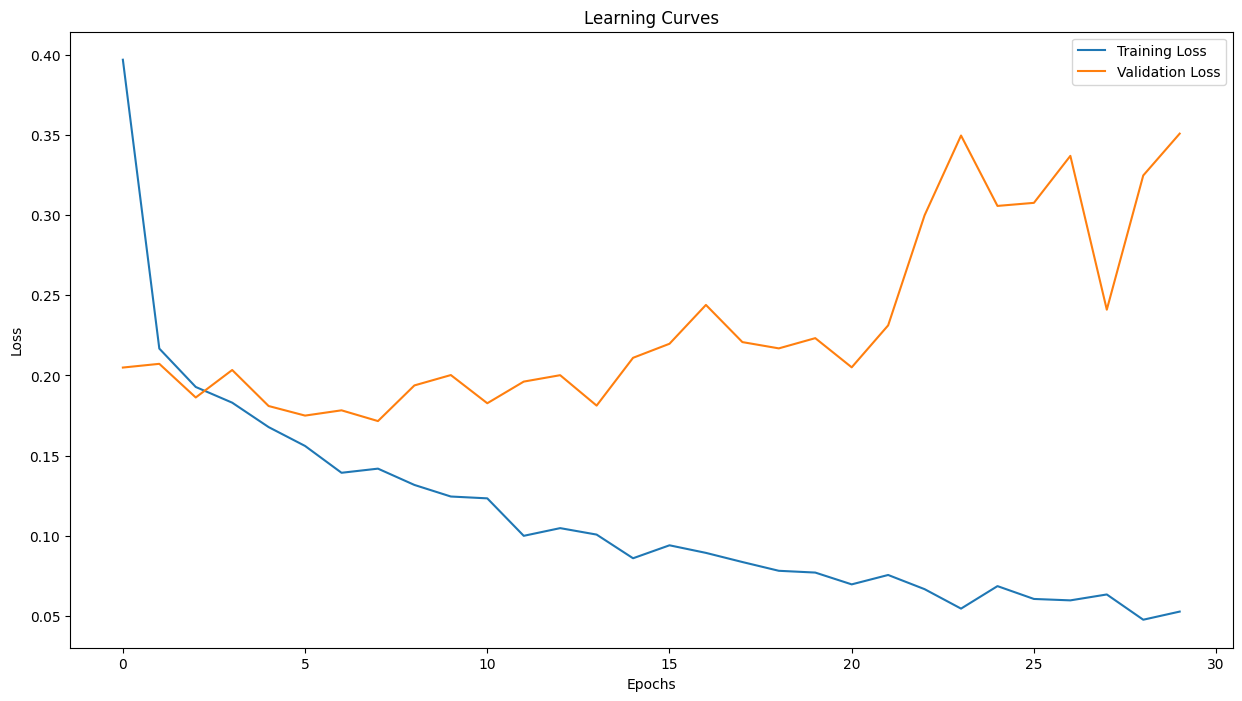

22/22 [==============================] - 0s 2ms/step
Accuracy DNN: 0.9580318379160637
Classification Report DNN :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       387
           1       0.96      0.94      0.95       304

    accuracy                           0.96       691
   macro avg       0.96      0.96      0.96       691
weighted avg       0.96      0.96      0.96       691



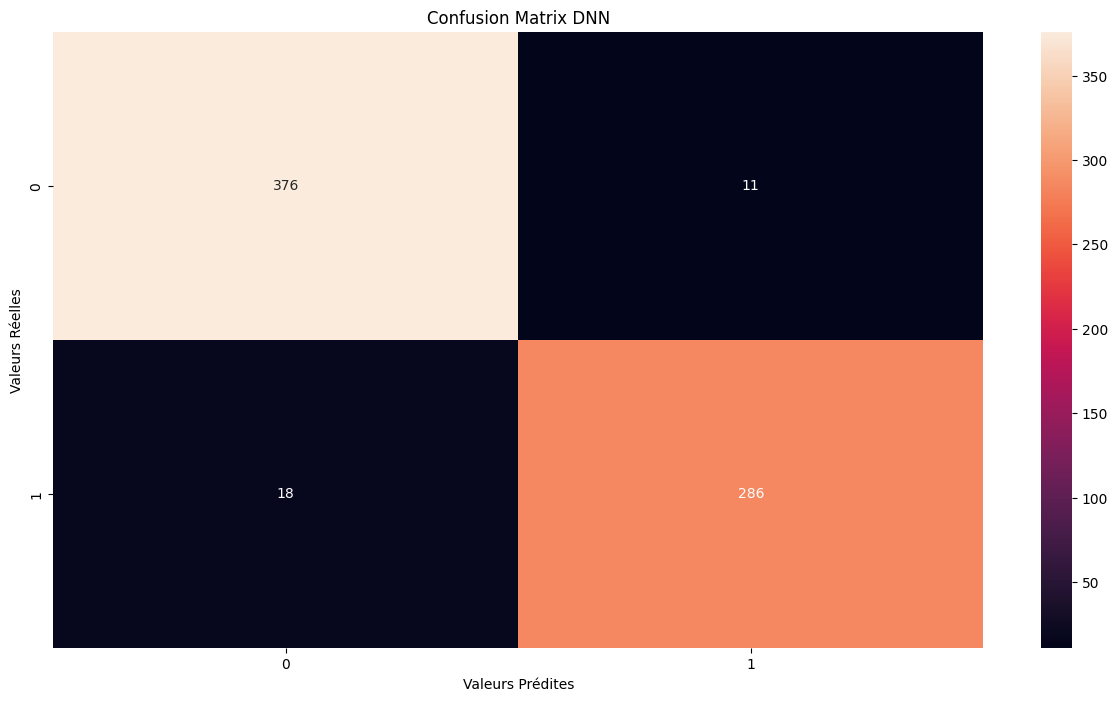

0.3508487641811371

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_predictions(y_true, y_pred):
    # Évaluation du modèle Random Forest
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"Accuracy DNN: {accuracy}")
    print(f"Classification Report DNN :\n{class_report}")

    plt.figure(figsize=(15, 8))

    # Graphique pour le modèle avec données non normalisées
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d')  # fmt='d' pour formater les nombres en entiers
    plt.title('Confusion Matrix DNN')
    plt.xlabel('Valeurs Prédites')
    plt.ylabel('Valeurs Réelles')
    plt.show()



def evaluate_model(best_hps, X_train, y_train, X_test, y_test):
    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    model = tuner.hypermodel.build(best_hps)    
    # Split des données d'entraînement en train et validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=2)
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)
    
    # Plot des learning curves
    plt.figure(figsize=(15, 8))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

    # Enregistrement de la perte finale pour chaque learning rate
    loss = history.history['val_loss'][-1]
    
    # Prédictions sur l'ensemble de test
    probabilities_vect = model.predict(X_test).reshape(model.predict(X_test).shape[0],)

    # Définition du seuil
    threshold = 0.5

    # Conversion en prédictions binaires
    predictions = (probabilities_vect >= threshold).astype(int)

    # Évaluation des prédictions
    evaluate_predictions(y_test, predictions)
    
    return loss
evaluate_model(best_hps, X_trainNrml, y_trainNrml, X_testNrml, y_testNrml)

Dans la classification binaire, plusieurs métriques d'évaluation sont utilisées pour mesurer les performances d'un modèle. Voici quelques-unes des métriques les plus couramment utilisées :

1. **Accuracy (Précision)** :
   Formule : \(\text{Accuracy} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}\)
   
2. **Precision (Précision)** :
   Formule : \(\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}\)

3. **Recall (Rappel ou Sensibilité)** :
   Formule : \(\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}\)

4. **F1-Score** :
   Formule : \(\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\)

5. **Specificity (Spécificité)** :
   Formule : \(\text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives + False Positives}}\)

6. **ROC AUC (Receiver Operating Characteristic Area Under Curve)** :
   C'est l'aire sous la courbe ROC, qui représente la capacité du modèle à discriminer entre les classes.

7. **Matrice de confusion** :
   Une matrice présentant les prédictions du modèle par rapport aux vraies valeurs, séparant les prédictions en True Positives, True Negatives, False Positives et False Negatives.

Chaque métrique a sa propre utilité en fonction du contexte et des objectifs du modèle de classification binaire.